<a href="https://colab.research.google.com/github/furtman/WQTC25_workshop_IMTR/blob/main/Ex_geospatial/water_quality_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCW01: From Data Management to Data Analysis — A Technical Deep-Dive**
## **Water Quality Data Visualization using Google Colab and R**
### AWWA WQTC 2025, Tacoma WA

---

This notebook walks through building and running an interactive **Shiny** dashboard inside **Google Colab** using the **R** programming language. Users will learn how to load, inspect, and analyze data from a spreadsheet, generate visualizations of time series plots and maps, and develop an easy-to-use dashboard that synthesizes data into single webpage.

The data used in this notebook is publicly available at Thurston County:
1.   Water Quality Data: https://github.com/HerreraEnvironmental/23-08082-000-TC-WQ-Dashboard/blob/main/wqp_data.csv
2.   Stream Site Locations and Aquatic Use Data: https://github.com/HerreraEnvironmental/23-08082-000-TC-WQ-Dashboard/blob/main/outputs/streams_sites.csv

Thurston County Streams Water Quality Dashboard: https://www.thurstoncountywa.gov/streams-water-quality-dashboard

---

Table of Contents:
1.   Setup R and Install Packages
2.   Load R Libraries
3.   Load and Inspect Data
4.   Data Cleaning and Processing
5.   Generating Plots
6.   Generating Statistics
7.   Generating Maps

## 1. Setup R and Install Packages
Prior to installing any packages, please change the **runtime type** to **R**.



In [1]:
# Install necessary packages (may take 6-8 minutes)
install.packages(c("ggplot2", "dplyr", "lubridate", "leaflet"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘lazyeval’, ‘sp’, ‘terra’, ‘classInt’, ‘s2’, ‘units’, ‘crosstalk’, ‘leaflet.providers’, ‘png’, ‘raster’, ‘sf’




## 2. Load R Libraries
In order to use the libraries, we need to load them into the notebook.

In [2]:
# Load in the R libraries that were just installed
library(shiny)
library(ggplot2)
library(dplyr)
library(lubridate)
library(leaflet)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## 3. Load and Inspect Data

In [3]:
# Path to data files
sites_url <- "path/to/file.csv"
data_url <- "path/to/file.csv"

# Or we can download directly from internet
# URLs of water quality data (Thurston County)
sites_url <- "https://raw.githubusercontent.com/HerreraEnvironmental/23-08082-000-TC-WQ-Dashboard/main/outputs/streams_sites.csv"
data_url <- "https://raw.githubusercontent.com/HerreraEnvironmental/23-08082-000-TC-WQ-Dashboard/main/wqp_data.csv"

In [5]:
# Read in stream site location data and inspect
sites <- read.csv(sites_url)
print("This is the stream site location data:")
head(sites) # show first 6 rows of data

[1] "This is the stream site location data:"


,gid,SITE_CODE,SITE_NAME,Metro_ID,LAT,LON,AquaticLifeUse
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,1202,EH-BUDAD0000,Adams Creek South Fork @ Boston Harbor Road NE,EH-BUDAD0000,47.09789,-122.8870,Core Summer Salmonid Habitat
2,1140,EH-DESAY0400,Ayer (Elwanger) Creek @ near Sienna Dr SE,EH-DESAY0400,46.97410,-122.8611,Core Summer Salmonid Habitat
3,NA,EH-BLABE0700,Beaver Creek @ Littlerock Road SW,EH-BLABE0700,46.89754,-123.0200,"Salmonid Spawning, Rearing, and Migration"
4,NA,EH-BUDBD0000,Black Lake Ditch @ RW Johnson Blvd SW,EH-BUDBD0000,47.02730,-122.9394,"Salmonid Spawning, Rearing, and Migration"
5,NA,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave SW 45b_gage,Black River @ 128th Ave. SW (45b),46.90176,-123.0238,Core Summer Salmonid Habitat
6,1143,EH-BLABL0000,Black River @ Howanut Road,EH-BLABL0000,46.82170,-123.2086,Core Summer Salmonid Habitat


In [7]:
# Read in water quality data and inspect
data <- read.csv(data_url)
print("This is the water quality data associated with each stream site:")
data # show all data, or first 30 / last 30 rows of data


[1] "This is the water quality data associated with each stream site:"


X,SITE_CODE,Metro_ID,date_time,value,unit,parameter,method,mdl,matrix,qualifier,dup,gid,SITE_NAME,LAT,LON,sample_utc_offset,pql,lab_batch,depth_m
<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
1,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2020-06-16 09:50:00,0.2020000,mg/L,Nitrate + Nitrite,353.2,0.010,NA,NA,Sample-Routine,NA,Black River @ 128th Ave SW 45b_gage,46.90176,-123.0238,NA,NA,NA,NA
2,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2022-02-07 09:05:00,0.0179000,mg/L,Phosphorus,4500-P-F,0.005,NA,NA,Sample-Routine,NA,Black River @ 128th Ave SW 45b_gage,46.90176,-123.0238,NA,NA,NA,NA
3,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2023-08-03 11:15:00,19.5500000,deg C,"Temperature, water",TEMPTHERM,NA,NA,NA,Field Msr/Obs,NA,Black River @ 128th Ave SW 45b_gage,46.90176,-123.0238,NA,NA,NA,NA
4,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2023-01-11 08:45:00,1.6900000,FNU,Turbidity,TURBM,NA,NA,NA,Field Msr/Obs,NA,Black River @ 128th Ave SW 45b_gage,46.90176,-123.0238,NA,NA,NA,NA
5,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2023-02-08 08:55:00,10.0400000,mg/L,Dissolved oxygen (DO),DO-OPTICAL,NA,NA,NA,Field Msr/Obs,NA,Black River @ 128th Ave SW 45b_gage,46.90176,-123.0238,NA,NA,NA,NA
6,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2022-04-04 08:55:00,0.3840000,mg/L,Nitrate + Nitrite,353.2,0.020,NA,NA,Sample-Routine,NA,Black River @ 128th Ave SW 45b_gage,46.90176,-123.0238,NA,NA,NA,NA
7,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2024-12-04 09:45:00,0.8800000,FNU,Turbidity,TURBM,NA,NA,NA,Field Msr/Obs,NA,Black River @ 128th Ave SW 45b_gage,46.90176,-123.0238,NA,NA,NA,NA
8,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2022-01-04 10:05:00,0.0186000,mg/L,Phosphorus,4500-P-F,0.005,NA,NA,Sample-Routine,NA,Black River @ 128th Ave SW 45b_gage,46.90176,-123.0238,NA,NA,NA,NA
9,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2020-05-05 09:40:00,0.0300000,mg/L,Phosphorus,365.1,0.002,NA,NA,Sample-Routine,NA,Black River @ 128th Ave SW 45b_gage,46.90176,-123.0238,NA,NA,NA,NA


## 4. Data Cleaning and Processing

In [ ]:
# Convert date_time column to a "date" data type
data$date_time_new <- parse_date_time(data$date_time, orders = c("ymd", "ymd HMS")) # since the dates are in multiple formats, we need to define those formats
head(data)

In [8]:
# Join the two dataframes based on a common column (i.e., SITE_NAME)
data <- data %>%
  left_join(sites %>% select(SITE_NAME, AquaticLifeUse), by = "SITE_NAME") # select the columns from the stream site data that you want to keep
head(data)

,X,SITE_CODE,Metro_ID,date_time,value,unit,parameter,method,mdl,matrix,⋯,dup,gid,SITE_NAME,LAT,LON,sample_utc_offset,pql,lab_batch,depth_m,AquaticLifeUse
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<chr>,<int>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
1,1,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2020-06-16 09:50:00,0.2020,mg/L,Nitrate + Nitrite,353.2,0.010,NA,⋯,Sample-Routine,NA,Black River @ 128th Ave SW 45b_gage,46.90176,-123.0238,NA,NA,NA,NA,Core Summer Salmonid Habitat
2,2,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2022-02-07 09:05:00,0.0179,mg/L,Phosphorus,4500-P-F,0.005,NA,⋯,Sample-Routine,NA,Black River @ 128th Ave SW 45b_gage,46.90176,-123.0238,NA,NA,NA,NA,Core Summer Salmonid Habitat
3,3,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2023-08-03 11:15:00,19.5500,deg C,"Temperature, water",TEMPTHERM,NA,NA,⋯,Field Msr/Obs,NA,Black River @ 128th Ave SW 45b_gage,46.90176,-123.0238,NA,NA,NA,NA,Core Summer Salmonid Habitat
4,4,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2023-01-11 08:45:00,1.6900,FNU,Turbidity,TURBM,NA,NA,⋯,Field Msr/Obs,NA,Black River @ 128th Ave SW 45b_gage,46.90176,-123.0238,NA,NA,NA,NA,Core Summer Salmonid Habitat
5,5,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2023-02-08 08:55:00,10.0400,mg/L,Dissolved oxygen (DO),DO-OPTICAL,NA,NA,⋯,Field Msr/Obs,NA,Black River @ 128th Ave SW 45b_gage,46.90176,-123.0238,NA,NA,NA,NA,Core Summer Salmonid Habitat
6,6,Black River @ 128th Ave. SW (45b),Black River @ 128th Ave. SW (45b),2022-04-04 08:55:00,0.3840,mg/L,Nitrate + Nitrite,353.2,0.020,NA,⋯,Sample-Routine,NA,Black River @ 128th Ave SW 45b_gage,46.90176,-123.0238,NA,NA,NA,NA,Core Summer Salmonid Habitat


In [9]:
# Stream site names
site_names <- unique(data$SITE_NAME)
site_names

[1] "Black River @ 128th Ave SW 45b_gage"                                    
  [2] "Salmon @ Littlerock"                                                    
  [3] "Scatter @ James"                                                        
  [4] "Deschutes River @ Waldrick Road 11a_gage"                               
  [5] "Deschutes @ Waldrick"                                                   
  [6] "Spurgeon"                                                               
  [7] "Eaton Creek @ Yelm Hwy 10a_gage"                                        
  [8] "Beaver Creek @ Littlerock Road SW"                                      
  [9] "Black River @ Howanut Road"                                             
 [10] "Black River @ Moon Road"                                                
 [11] "Black River @ Johnsons dock nr fmr  Trestle Bridge Holm-Laymon Roads SW"
 [12] "Black River RM 10.7 @ Swecker Salmon Farm Dock nr Wheat Street SW"      
 [13] "Black River @ Shaner Creek mouth nr Canoe Club"                         
 [14] "Blooms Ditch @ 110th Ave SW"                                            
 [15] "McLane Creek @ Delphi Road SW"                                          
 [16] "Shaner Creek @ Littlerock Road SW aka Canoe Club Creek"                 
 [17] "Dempsey Creek @ Delphi Road"                                            
 [18] "Mima Creek @ Gate Road"                                                 
 [19] "Mima Creek tributary @ Gate Road"                                       
 [20] "Salmon Creek @ near driveway off Creekwood Dr"                          
 [21] "Waddell Creek @ Waddell Creek Road SW"                                  
 [22] "Adams Creek South Fork @ Boston Harbor Road NE"                         
 [23] "Black Lake Ditch @  RW Johnson Blvd SW"                                 
 [24] "Butler Creek @ French Loop Road NW"                                     
 [25] "Capitol Lake @ Marathon Park Railroad Bridge"                           
 [26] "Ellis Creek @ East Bay Drive"                                           
 [27] "Indian Creek Mouth @ Quince Street SE"                                  
 [28] "Mission Creek @ East Bay Drive"                                         
 [29] "Moxlie Creek @ Marine Drive NE"                                         
 [30] "Moxlie Creek @ Plum Street SE"                                          
 [31] "Moxlie Creek @ Plum St SE & Henderson Blvd SE"                          
 [32] "Percival Creek @ Pedestrian Footbridge"                                 
 [33] "Percival Creek @ Percival Cove"                                         
 [34] "Percival Creek @ Mottman Road SW"                                       
 [35] "Schneider Creek @ West Bay Drive"                                       
 [36] "Chehalis River @ Independence Road SW"                                  
 [37] "Chehalis River @ Prather Road SW"                                       
 [38] "Prairie Creek @ Old Hwy 9 SW"                                           
 [39] "Scatter Creek @ Sargent Road SW"                                        
 [40] "Scatter Creek @ Leitner Road SW"                                        
 [41] "Scatter Creek @ Gibson Road"                                            
 [42] "Scatter Creek @ Oak Drive SE"                                           
 [43] "Scatter Creek @ Old Hwy 99 South"                                       
 [44] "Scatter Creek @ Old Military Road SE"                                   
 [45] "Ayer (Elwanger) Creek @ near Sienna Dr SE"                              
 [46] "Chambers Creek @ End of 58th Ave SE"                                    
 [47] "Deschutes @ Tumwater Falls Park"                                        
 [48] "Deschutes River @ Henderson Blvd SE"                                    
 [49] "Deschutes River @ Rich Road"                                            
 [50] "Deschutes River @ SR507"                                                
 [

In [10]:
# Water quality parameters
param_names <- unique(data$parameter)
param_names

[1] "Nitrate + Nitrite"                        
 [2] "Phosphorus"                               
 [3] "Temperature, water"                       
 [4] "Turbidity"                                
 [5] "Dissolved oxygen (DO)"                    
 [6] "pH"                                       
 [7] "Specific conductance"                     
 [8] "Fecal Coliform"                           
 [9] "Total Phosphorus, mixed forms"            
[10] "Escherichia coli"                         
[11] "Flow"                                     
[12] "Ammonia-nitrogen"                         
[13] "Enterococcus"                             
[14] "Light attenuation at measurement depth"   
[15] "Depth to bottom of sample interval"       
[16] "Lead"                                     
[17] "Hardness"                                 
[18] "Copper"                                   
[19] "Total suspended solids"                   
[20] "Zinc"                                     
[21] "Petroleum hydrocarbons, total extractable"
[22] "Anatoxin-A"                               
[23] "Microcystin"                              
[24] "Conductivity"

## 5. Generating Plots

In [11]:
# Choose a site and parameter
example_site <- site_names[47]
print(paste('The site name is:', example_site))

example_param <- param_names[3]
print(paste('The parameter name is:', example_param))

[1] "The site name is: Deschutes @ Tumwater Falls Park"
[1] "The parameter name is: Temperature, water"


In [12]:
# Filter data based on selections above
filtered_data <- data %>%
  filter(SITE_NAME == example_site, parameter == example_param)
filtered_data

X,SITE_CODE,Metro_ID,date_time,value,unit,parameter,method,mdl,matrix,⋯,dup,gid,SITE_NAME,LAT,LON,sample_utc_offset,pql,lab_batch,depth_m,AquaticLifeUse
<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<chr>,<int>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
33674,EH-DESDE0000,EH-DESDE0000,2021-05-03,12.45200,deg C,"Temperature, water",TEMPTHERM,NA,Surface Water,⋯,Field Msr/Obs,NA,Deschutes @ Tumwater Falls Park,47.01412,-122.9033,NA,NA,NA,NA,"Salmonid Spawning, Rearing, and Migration"
33696,EH-DESDE0000,EH-DESDE0000,2011-11-15,6.90000,deg C,"Temperature, water",See_external_files,NA,Surface Water,⋯,Field Msr/Obs,NA,Deschutes @ Tumwater Falls Park,47.01412,-122.9033,NA,NA,NA,NA,"Salmonid Spawning, Rearing, and Migration"
33706,EH-DESDE0000,EH-DESDE0000,2019-12-17,6.08700,deg C,"Temperature, water",TEMPTHERM,NA,Surface Water,⋯,Field Msr/Obs,NA,Deschutes @ Tumwater Falls Park,47.01412,-122.9033,NA,NA,NA,NA,"Salmonid Spawning, Rearing, and Migration"
33734,EH-DESDE0000,EH-DESDE0000,2007-10-23,10.46000,deg C,"Temperature, water",See_external_files,NA,Surface Water,⋯,Field Msr/Obs,NA,Deschutes @ Tumwater Falls Park,47.01412,-122.9033,NA,NA,NA,NA,"Salmonid Spawning, Rearing, and Migration"
33739,EH-DESDE0000,EH-DESDE0000,2012-03-20,6.88000,deg C,"Temperature, water",See_external_files,NA,Surface Water,⋯,Field Msr/Obs,NA,Deschutes @ Tumwater Falls Park,47.01412,-122.9033,NA,NA,NA,NA,"Salmonid Spawning, Rearing, and Migration"
33740,EH-DESDE0000,EH-DESDE0000,2001-07-24,15.97000,deg C,"Temperature, water",See_external_files,NA,Surface Water,⋯,Field Msr/Obs,NA,Deschutes @ Tumwater Falls Park,47.01412,-122.9033,NA,NA,NA,NA,"Salmonid Spawning, Rearing, and Migration"
33748,EH-DESDE0000,EH-DESDE0000,2013-10-21,9.57000,deg C,"Temperature, water",See_external_files,NA,Surface Water,⋯,Field Msr/Obs,NA,Deschutes @ Tumwater Falls Park,47.01412,-122.9033,NA,NA,NA,NA,"Salmonid Spawning, Rearing, and Migration"
33749,EH-DESDE0000,EH-DESDE0000,2021-11-08,7.97200,deg C,"Temperature, water",TEMPTHERM,NA,Surface Water,⋯,Field Msr/Obs,NA,Deschutes @ Tumwater Falls Park,47.01412,-122.9033,NA,NA,NA,NA,"Salmonid Spawning, Rearing, and Migration"
33763,EH-DESDE0000,EH-DESDE0000,2007-12-11,5.94000,deg C,"Temperature, water",See_external_files,NA,Surface Water,⋯,Field Msr/Obs,NA,Deschutes @ Tumwater Falls Park,47.01412,-122.9033,NA,NA,NA,NA,"Salmonid Spawning, Rearing, and Migration"


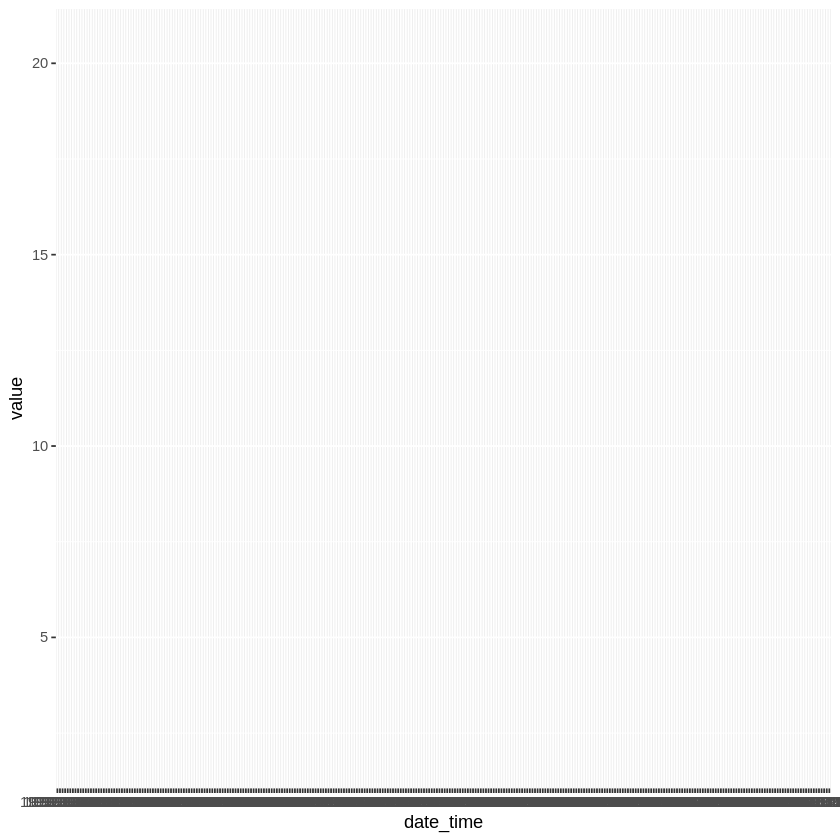

In [13]:
# Generate a basic time series plot
ggplot(data = filtered_data, aes(x = date_time, y = value)) +
  geom_line(color = "blue")

In [ ]:
# Edit the plot
ggplot(data = filtered_data, aes(x = date_time, y = value)) +
  geom_line(color = "blue") +
  geom_point(color = "darkblue") + # add points
  labs(title = paste(example_param, "at", example_site), # plot title
        x = "Date", # x-axis title
        y = paste0(example_param, " (", unique(filtered_data$unit), ")")) + # y-axis title
  theme(
    plot.title = element_text(size = 16), # plot title font size
    axis.title = element_text(size = 14), # axis title font size
    axis.text = element_text(size = 14) # axis text (values and dates) font size
  )

## 6. Generating Multiple Plots

In [ ]:
# Use a for loop to generate plots of stream temperature at each site location and save as a pdf
for (site in site_names) {
  print(paste("Plotting"))
}

## 6. Generating Statistics

In [ ]:
# Generate some basic stats of the example site and parameter
mean <- mean(filtered_data$value)
min <- min(filtered_data$value)
max <- max(filtered_data$value)

paste('The MEAN', example_param, 'at', example_site, 'is:', mean, unique(filtered_data$unit))
paste('The MIN', example_param, 'at', example_site, 'is:', min, unique(filtered_data$unit))
paste('The MAX', example_param, 'at', example_site, 'is:', max, unique(filtered_data$unit))

In [ ]:
# Generate a summary table of stats
summary_table <- filtered_data %>%
  summarise(
    Records = n(), # number of records
    Mean = round(mean(value, na.rm = TRUE), 2), # mean rounded to 2 decimals
    Min = round(min(value, na.rm = TRUE), 2), # min rounded to 2 decimals
    Max = round(max(value, na.rm = TRUE), 2), # max rounded to 2 decimals
    First_Record = min(date_time),
    Last_Record = max(date_time)
  )

summary_table


## 7. Generating Maps